In [2]:
###########################################################
# LR Normal Equation (closed-form solution for LR problem)
##########################################################
# generate some linear data
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)            # y = 4 + 3X + Gaussian Noise

"""
plt.scatter(x=X, y=y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()
"""

"\nplt.scatter(x=X, y=y)\nplt.xlabel('X')\nplt.ylabel('y')\nplt.show()\n"

In [3]:
# Implement Normal Equation theta^hat = (X^T . X)^(-1) . X^T . y
# In LR equation y^hat = theta^T . X, theta^T is row vector (theta is column vector), which multiplies
# column vector X. Implementing this requires adding X0=[1] column to X, so first element of multiplication
# returns bias term theta0
X_b = np.c_[np.ones_like(X), X]               # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best              # pretty close to (4, 3)

array([[4.06980118],
       [2.861312  ]])

In [4]:
# prediciton
X_ = np.array([[0], [2]])
print(X_.shape)
X_ = np.c_[np.ones_like(X_), X_].T          # add x0 = 1 to each instance and do transpose
X_.shape

(2, 1)


(2, 2)

In [5]:
y_hat = np.matmul(theta_best.T, X_)             # y^hat = theta^T . X
y_hat

array([[4.06980118, 9.79242519]])

In [6]:
"""
plt.scatter(x=X, y=y)
plt.plot([0,2], y_hat.flatten(), color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
"""

"\nplt.scatter(x=X, y=y)\nplt.plot([0,2], y_hat.flatten(), color='red', label='Predictions')\nplt.xlabel('X')\nplt.ylabel('y')\nplt.legend()\nplt.show()\n"

In [7]:
# equivalent code using sklearn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
lin_reg.predict(np.array([[0],[2]]))

[4.06980118] [[2.861312]]


array([[4.06980118],
       [9.79242519]])

In [8]:
# LinearRegression class is based on scipy.linalg.lstsq function that can be called directly
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.06980118],
       [2.861312  ]])

In [9]:
#######################################################
# Gradient Descent
#######################################################
# Normal equation computes inverse of n * n mattrix (X^T . X), for n features. Computational complexity
# of inverting this matrix is ~O(n^2.4) to O(n^3) depending on algorithm => doubling feature number increases
# computational time by a factor of 2^2.4 = 5.3 to 2^3 = 8.
# 'Gradient Descent' to rescue, which searches for a combination of model parameters to minimize a cost function
# (over training set) => cost function is convex for linear regression => search leads arbitrarily close to global minimum.
# Training LR model with large number of features using gradient descent is much faster than computing Normal Equation.

# data prep
X = np.linspace(start=0, stop=1, num=100)
y = (0.5 * X) + 0.1 + 0.3 * np.random.rand(100)

# append 1s to X
X = np.c_[np.ones_like(X), X]

In [10]:
# randomly initialize parameters 
theta = np.random.rand(2)

In [11]:
# function to compute MSE (cost funtion for gradient descent) of the whole training data
def mse(X, y, theta):
    """Returns the Mean Squared Error

    # Arguments:
        X, np.ndarray: the input training data with `1`s appended to each row
        y, np.ndarray: the targets of the training row
        theta, np.ndarray: the parameter vector of the model

    # Returns
        MSE, float: Mean Squared Error between `X*theta` and `y`
    """
    m = X.shape[0]
    X_theta = np.matmul(X, theta)
    return 1./m * np.matmul((X_theta - y).T, (X_theta - y))     # cost function gradient computed with entire training set

In [12]:
# function to compute gradient vector of MSE of the whole training data
def grad_mse(X, y, theta):
    """Returns MSE's Gradient Vector

    # Arguments:
        X, np.ndarray: the input training data with `1`s appended to each row
        y, np.ndarray: the targets of the training row
        theta, np.ndarray: the parameter vector of the model

    # Returns
        grad_mse, np.ndarray: the gradient vector of the mean squared error function
    """
    m = X.shape[0]
    X_theta = np.matmul(X, theta)
    return 2./m * np.matmul(X.T, X_theta - y)                   # cost function gradient computed with entire training set

In [13]:
# choose learning rates (step size for gradient descent)
lrate = [0.01, 0.05, 0.1]

# batch gradient descent for each learning rate (to optimize model parameters theta[0] and theta[1])
thta = np.zeros((len(lrate), 2))                # array to store optimized theta for different lr
for i, lr in enumerate(lrate):                  # loop through learning rates
    thta[i] = theta
    while mse(X, y, thta[i]) > lr:              # gradient descent for each lr
         thta[i] = thta[i] - lr * grad_mse(X, y, thta[i])       # update parameters with GD

thta

array([[0.13308169, 0.70403405],
       [0.16870983, 0.93577485],
       [0.20480753, 0.96131694]])

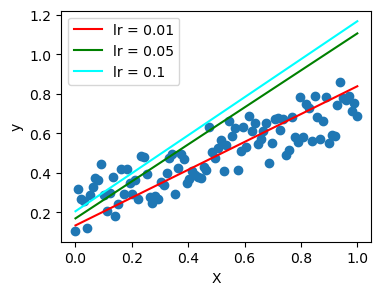

In [14]:
plt.figure(figsize=(4,3))
plt.scatter(x=X[:,1], y=y)
plt.plot([0,1], [thta[0,0] + thta[0,1]*0, thta[0,0] + thta[0,1]*1], color='red', label='lr = 0.01')
plt.plot([0,1], [thta[1,0] + thta[1,1]*0, thta[1,0] + thta[1,1]*1], color='green', label='lr = 0.05')
plt.plot([0,1], [thta[2,0] + thta[2,1]*0, thta[2,0] + thta[2,1]*1], color='cyan', label='lr = 0.1')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

In [15]:
# -> Number of iterations needed for convergence depend on learning rate
# -> Learning rate can be found using grid search
# -> May need to constrain #iteraions for grid search to eliminate models that take too long to converge
# -> One way to limit #iterations:
#    -> start with very high #iterations
#    -> then interrupt algorithm when gradient vector becomes tiny, i.e. norm becomes smaller than a present   #       'tolerance' eta (this happens when gradient descent has almost reached minimum)
# -> For a cost function that is convex and smooth (slope does not change abruptly, as for MSE cost function),
#    batch gradient descent with a fixed learning rate converges at a rate of (1/#iterations) => dividing
#    tolerance by 10 (for a more precise solution) would make the algorithm run ~10 times more iterations

In [16]:
#######################################################
# Stochastic Gradient Descent
#######################################################
# -> Batch Gradient Descent uses whole training set => takes long time for large data set
# -> 'Stochastic Gradient Descent' uses one random instance from training set at every step, and computes 
#    gradient for that instance => can be used with huge data set
# -> Due to its stochastic nature, cost function for SGD decreases only on average, and keeps bouncing up/down 
#    even after getting very close to the global minimum (unlike BGD where convergence is slow but steady)
#    => SGD algorithm finds 'good' final parameter values, but not 'optimal' as in BGD
# -> For irregular cost function, SGD algorithm can escape local minimum, but never settles at global minimum;
#    one way to deal with it is to start at a large learning rate, then gradually reduce it ('simulated #
#    annealing')
# -> Function that determines learning rate at every iteration is called the 'learning schedue'

# function to compute stochastic gradient descent MSE of one training data instance
def sgd_mse(X_i, y_i, theta):
    """Returns the Mean Squared Error for Stochastic gradient descent.
    
    # Arguments:
        X_i, np.ndarray shape=(1,n): the intput training data row vector with `1` in the beginning.
        y, np.ndarray shape=(1,1): the target of the training row.
        theta, np.ndarray shape=(n,1): the parameters vector of the model.
    
    # Returns
        MSE, float: Mean Squared Error between `X*theta` and `y`.
    """
    X_theta = np.matmul(X_i, theta)
    return (X_theta - y_i)**2                       # cost function gradient computed with one random training instance

In [17]:
# function to compute SGD's MSE gradient vector of one training instance
def grad_sgd_mse(X_i, y_i, theta):
    """Returns Stochastic Gradient Descent's Mean Squared Error Gradient.
    
    # Arguments
        X_i, np.ndarray shape=(1,n): the intput training data row vector with `1` in the beginning.
        y, np.ndarray shape=(1,1): the target of the training row.
        theta, np.ndarray shape=(n,1): the parameters vector of the model.
    
    # Results
        grad_mse, np.ndarray: the gradient vector of the mean squared error function. 
    """
    X_theta = np.matmul(X_i, theta)
    return 2. * X_i.T * (X_theta - y_i)             # cost function gradient computed with one random training instance

In [18]:
# function to set simple learning schedule
def learning_rate_scheduler(lr, perc):
    """Returns annealed learning rate based on current one & reduction percentage
    
    # Arguments
        lr: float, initial learning rate
        perc: float \in [0,1]: annealing percentage
    
    # Returns
        next_lr: float, next learning rate to use
    """
    return perc * lr

In [19]:
# run SGD
theta = np.random.rand(2)           # random initialization of parameters

lr, steps = 0.1, 100000             # start with high learning rate (to escape local minima)
for _ in range(steps):              # run SGD for large number of steps
    random_idx = np.random.randint(low=0, high=X.shape[0])                      # choose one random data index
    lr = learning_rate_scheduler(lr, perc=0.99)                                 # reduce learning rate in steps
    theta = theta - lr * grad_sgd_mse(X[random_idx], y[random_idx], theta)     # update parameters with SGD

theta

array([0.24929596, 0.49236117])

In [20]:
# SGD using sklearn
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X=X, y=y)
sgd_reg.coef_

array([0.14752202, 0.41233257])

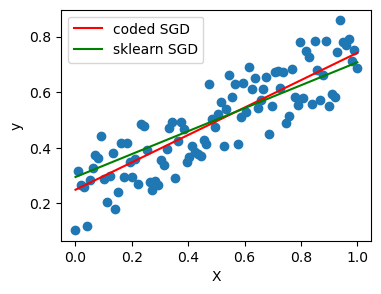

In [21]:
plt.figure(figsize=(4,3))
plt.scatter(x=X[:,1], y=y)
plt.plot([0,1], [theta[0] + theta[1]*0, theta[0] + theta[1]*1], color='red', label='coded SGD')
plt.plot([0,1], [sgd_reg.predict(X=[[1, 0]]), sgd_reg.predict(X=[[1, 1]])], color='green', label='sklearn SGD')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

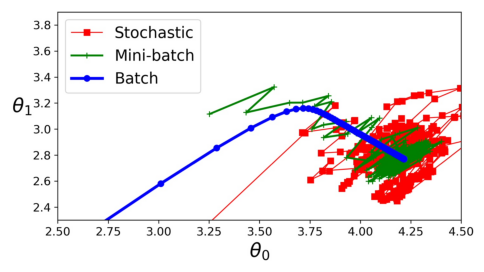

In [22]:
# Convergence comparison among SGD, BGD and MBGD
import matplotlib.image as mpimg
img = mpimg.imread('GD_comparison.png')
plt.figure(figsize=(6,4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [23]:
#############################################################
# Polynomial Regression (# LR with added polynomial features)
#############################################################
# data preparation
m = 100                     # data size
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)      # added quadratic feature (parabola)

# model training
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)             # add quadratic feature to original feature
X[0], X_poly[0]

(array([-2.06619276]), array([-2.06619276,  4.26915254]))

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.92211428]), array([[0.90111551, 0.49273799]]))

In [25]:
"""
# visualize
X_p = np.linspace(start=-3, stop=3, num=100).reshape(-1, 1)     # smooth X-value for plotting
X__p = poly_features.transform(X_p)
plt.scatter(X, y, color='blue')
plt.plot(X_p, lin_reg.predict(X=X__p), color='red', label='predictions', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()
"""

"\n# visualize\nX_p = np.linspace(start=-3, stop=3, num=100).reshape(-1, 1)     # smooth X-value for plotting\nX__p = poly_features.transform(X_p)\nplt.scatter(X, y, color='blue')\nplt.plot(X_p, lin_reg.predict(X=X__p), color='red', label='predictions', linewidth=3)\nplt.xlabel('X')\nplt.ylabel('y')\nplt.legend(loc='upper left')\nplt.show()\n"

In [26]:
####################################################
# Learning curves
####################################################
# one way to determine if model is overly complex (overfitting/unerfitting data); plots model's performance
# on training and validation set as a function of training ser size
# CV is another way => if model performs well on training data but generalizes poorly (does bad on test data)
# by CV metric, it is overfitting; if it does bad on both, it is underfitting

# function to compute learning curves
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def get_learning_curves(model, X, y):
    """Returns model training/validation's MSE over different sizes of training sets.
    
    # Arguments
        model: sklearn.*, a scikit-learn model to be trained/tested.
        X: np.ndarray, the input dataset.
        y: np.ndarray, the output dataset.
    """
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = list(), list()
    for m in range(1, X_train.shape[0]):                # data size looping from 1 to whole training data
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    return train_errors, val_errors

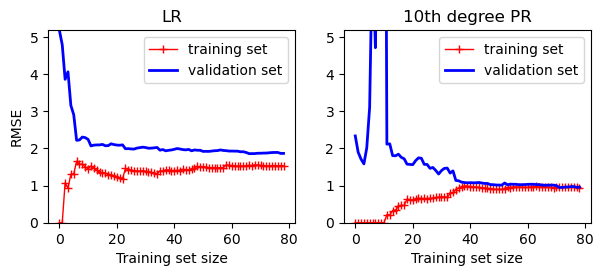

In [27]:
# Learning curves for LR and degree-10 PR
lin_reg = LinearRegression()
lr_train_errors, lr_val_errors = get_learning_curves(lin_reg, X, y)

from sklearn.pipeline import Pipeline
pol_reg = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('sgd_reg', LinearRegression())
])
pr_train_errors, pr_val_errors = get_learning_curves(pol_reg, X, y)

# visualize
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,2.5))
ymax = max(np.sqrt(lr_val_errors))                          # limit y-axis
ax[0].plot(np.sqrt(lr_train_errors), 'r-+', linewidth=1, label='training set')
ax[0].plot(np.sqrt(lr_val_errors), 'b-', linewidth=2, label='validation set')
ax[0].set_xlabel('Training set size')
ax[0].set_ylabel('RMSE')
ax[0].set_ylim([0, ymax])
ax[0].legend(loc='upper right')
ax[0].set_title('LR')
ax[1].plot(np.sqrt(pr_train_errors), 'r-+', linewidth=1, label='training set')
ax[1].plot(np.sqrt(pr_val_errors), 'b-', linewidth=2, label='validation set')
ax[1].set_xlabel('Training set size')
ax[1].set_ylim([0, ymax])
ax[1].legend(loc='upper right')
ax[1].set_title('10th degree PR')
plt.show()
# both training and validation errors plateau for LR => model not goo enough
# training error much lower / there is gap in plots for PR => model overfits training data 

In [28]:
############################################################
# Regularized Linear Models
############################################################
# For linear models, regularization is done by constraining model weights
# for polynomial models, regularization is done by constraining polynomial degrees
# three types of regulrizations for LR models: ridge regression, lasso regression, elastic net

# Ridge Regression for closed-form solution
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')   # uses Andre-Louis Cholesky's matrix factorization technique
ridge_reg.fit(X, y)

# Ridge regression for Stochastic Gradient Descent (with l2 norm regularization of cost function)
sgd_reg = SGDRegressor(penalty='l2')            # adds (1/2)*||weight vector||^2 to cost function
sgd_reg.fit(X, y.ravel())                       # y.ravel() returns flattens 1D vector form of y

ridge_reg.predict([[1.5]]), sgd_reg.predict([[1.5]])

(array([[4.59041147]]), array([4.55543376]))

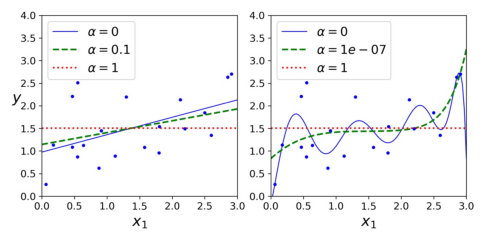

In [29]:
# Lasso regression (uses l1 norm regularization for cost function, instead of (1/2)*l2 norm);
# tends to completely eliminate weights of least important features (set them to zero)
# in the right-side example below, dashed line (with alpha=1e-7) looks quadratic => all weights for
# higher-degree polynomial features are equal to zero => lasso regression automatically performs
# feature selection and outputs a *sparse model*

img = mpimg.imread('lasso_examples.png')
plt.figure(figsize=(6,4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [30]:
# lasso cost function is non-differentiable, but Gradient Descent still works
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)        # same as using SGDRegressor(penalty='l1')
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.53784876])

In [31]:
# Eastic Net (mix of Ridge and Lasso => 'mix ratio' r=0 gives Ridge, r=1 gives Lasso)
# When to use ridge / lasso / elastic net? Ridge is good default, except when fewer features are needed,
# then elastic net is better (elastic net is preferred over lasso for very large number of features)

from sklearn.linear_model import ElasticNet
elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)       # l1_ratio = r
elastic_reg.fit(X, y)
elastic_reg.predict([[1.5]])

array([4.5427265])

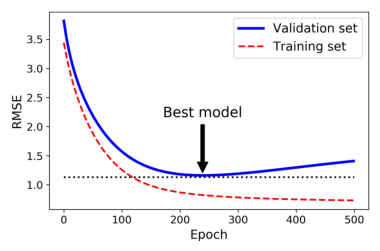

In [32]:
# Early Stopping
# => another way to regularize iterative learning algorithms (e.g. Gradient Descent) is to stop training
# as soon as validation error reaches a minimum
# Image below shows a complex model (high-degree PR model) being trained using Batch Gradient Descent
# => after a while validation error goes back up because model begins to overfit => stop training 


img = mpimg.imread('early_stopping.png')
plt.figure(figsize=(5,3))
plt.imshow(img)
plt.axis('off')
plt.show()

In [33]:
# implement early stopping
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)
sgd_reg = SGDRegressor(
    max_iter = 1,
    tol = -np.infty,
    warm_start = True,           # continue training instead of restarting from scratch (when fit() method is called)
    penalty = None,
    learning_rate = 'constant',
    eta0 = 0.0005
)
minimum_val_error = float('inf')
best_epoch, best_model = None, None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)               # continue where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

best_epoch, best_model

(998,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              tol=-inf, warm_start=True))

In [34]:
#######################################################
# Logistic Regression
#######################################################
# Decision Boundary
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys()))
X = iris.data[:, 3:]                         # petal width
y = (iris.target == 2).astype(np.int)        # 1 if iris virginica, else 0
X.shape, y.shape

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']


((150, 1), (150,))

In [35]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

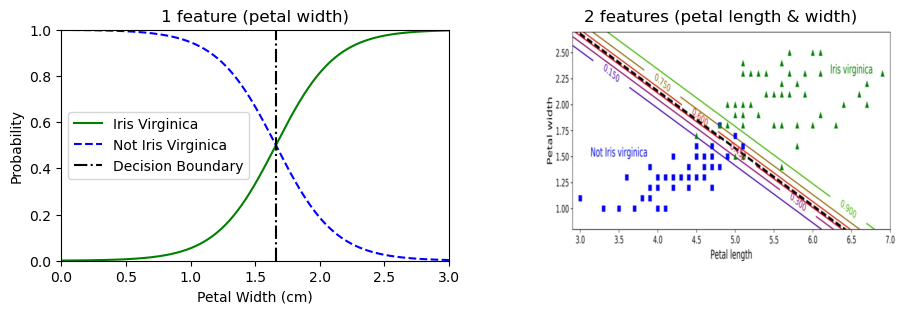

In [43]:
# model probabilities for petal width in range (0,3)
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 3))
ax[0].plot(X_new, y_proba[:, 1], 'g-', label='Iris Virginica')
ax[0].plot(X_new, y_proba[:, 0], 'b--', label='Not Iris Virginica')
ax[0].plot([1.66, 1.66], [0, 1], '-.', color='black', label='Decision Boundary')
ax[0].set_xlabel('Petal Width (cm)')
ax[0].set_ylabel('Probability')
ax[0].set_xlim((0., 3.))
ax[0].set_ylim((0., 1.))
ax[0].legend(loc='center left', fontsize=10)
ax[0].set_title('1 feature (petal width)')

# Decision Boundary with 2 features
img = mpimg.imread('2d_decision_boundary.png')
ax[1].imshow(img)
ax[1].axis('off')
ax[1].set_title('2 features (petal length & width)')
plt.show()

In [122]:
# Softmax Regression (or Multinimial Logistic Regression => Logistic Regression for multiclass data)
X = iris.data[:, (2,3)]             # petal length, width
y = iris.target
# l2 regularization used by default (controlled by hyperparameter C)
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)
# predict flower type for 5cm long and 2cm wide petal
# => class 2 (Iris-Virginica) with 94% probability, class 1 (Iris-Versicolor) with 5.8% probability)
softmax_reg.predict([[5, 2]]), softmax_reg.predict_proba([[5, 2]])

(array([2]), array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]]))

In [123]:
###############################################################################################################
# Exercise: Implement Batch Gradient Descent with Early Stopping for Softmax Regression (without using sklearn)
###############################################################################################################
# get MNIST data
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.load_digits(return_X_y=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1257, 64), (540, 64), (1257,), (540,))

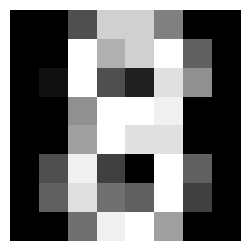

In [124]:
plt.figure(figsize=(3,3))
plt.imshow(X_train[0].reshape(8,8), cmap='gray')
plt.axis('off')
plt.show()

In [125]:
y_train[0]

8

In [126]:
m, n = X_train.shape
K = len(set(y_train))           # number of classes for softmax regression
m, n, K

(1257, 64, 10)

In [127]:
X_train_ = np.concatenate((np.ones((m, 1)), X_train), axis=1)               # add column '1' to X_train
X_val_ = np.concatenate((np.ones((X_val.shape[0], 1)), X_val), axis=1)      # add column '1' to X_val
X_train_.shape, X_val_.shape

((1257, 65), (540, 65))

In [128]:
W = np.random.rand(n+1, K)  # 65 X 10 randomly initialized theta (one theta vector for each of 10 classes)
W.shape

(65, 10)

In [129]:
# softmax function to compute probability of instance x belonging to a class k
def softmax(u):
    """Calculate the softmax vector using the input matrix
    
    # Arguments
        u: np.ndarray, input matrix of samples
    
    # Returns
        v: np.nadarray, softmaxed output matrix (of size m X K)
    """
    return np.exp(u)/np.sum(np.exp(u), axis=1)[:,None]

In [130]:
# function to compute softmax score for each instance and each class
def linear(X, W):
    """A Simple Linear Transformation
    """
    return np.matmul(X, W)

In [131]:
# confirm that softmax function returns probabilities
# => sum of probabilities over all classes must equal 1 for each instance
softmax(linear(X_train_, W)).sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [132]:
# function to compute cost function (cross entropy) for multiclass classifier training
# (reduces to logistic regression's logloss for two classes: K=2)
def cross_entropy(preds, targets):
    """Returns Cross Entropy Loss for Multi-class Classification"""
    
    m, K = preds.shape
    log_p = np.log(preds)
    y_logp = targets * log_p  # elementwise
    return (-1/m) * y_logp.sum(axis=1).sum()

In [133]:
# function to one-hot encode target vector (convert 1D vector of size m to binary matrix of size m X K)
# this is needed to pass argument of same dimension as 'preds' to cross_entropy() function above
def one_hot(u):
    m, K = u.shape[0], len(set(u))
    encoded = np.zeros((m, K))
    for i, u_i in enumerate(u):
        encoded[i][u_i] = 1
    return encoded

In [134]:
p_hat = softmax(linear(X_train_, W))
print(p_hat.shape, y_train.shape, one_hot(y_train).shape)
cross_entropy(p_hat, one_hot(y_train))

(1257, 10) (1257,) (1257, 10)


29.74009966623465

In [135]:
# function to compute grdient for cross entropy loss function for each feature and each class
def grad_cross_entropy(inputs, preds, targets):
    """Calculate the gradient of the cross entropy loss function."""
    
    m, n = inputs.shape
    k = preds.shape[1]
    err = preds - targets
    return (1./m) * np.matmul(inputs.T, err)

In [136]:
grad_cross_entropy(X_train_, p_hat, one_hot(y_train)).shape

(65, 10)

In [137]:
# simple function for early stopping
def early_stop(val_losses):
    """Returns True if current_val_loss > prev_val_loss"""
    
    if len(val_losses) > 1:
        if val_losses[-1] > val_losses[-2]:
            return True
    return False

In [138]:
# batch gradient descent algorithm
epochs, lr = 10000, 0.02
train_losses, val_losses = list(), list()
W = np.random.rand(n+1, K)
for epoch in range(epochs):
    # forward pass
    y_preds = softmax(linear(X_train_, W))          # probability of each instance belonging to each class
    
    # calculate train loss
    train_loss = cross_entropy(y_preds, one_hot(y_train))
    train_losses.append(train_loss)
    
    # calculate validation loss
    val_loss = cross_entropy(softmax(linear(X_val_, W)), one_hot(y_val))
    val_losses.append(val_loss)
    
    # Optimize parameters
    W = W - (lr * grad_cross_entropy(X_train_, y_preds, one_hot(y_train)))
    
    # early stop
    if early_stop(val_losses):
        break

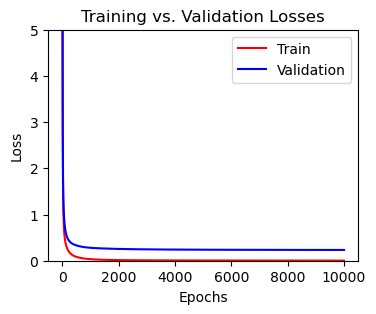

In [139]:
# plot training vs validation losses
plt.figure(figsize=(4,3))
plt.plot(range(len(train_losses)), train_losses, color='red', label='Train')
plt.plot(range(len(val_losses)), val_losses, color='blue', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,5)
plt.legend()
plt.title('Training vs. Validation Losses')
plt.show()

In [140]:
# check accuracy over validation set
val_preds = np.argmax(softmax(linear(X_val_, W)), axis=1)
acc = ((val_preds == y_val).sum())/len(val_preds)
acc         # >95% accurarcy over unseen data

0.9537037037037037